<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/understanding_CNN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop(labels=["label"], axis=1)
Y_train = train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [6]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

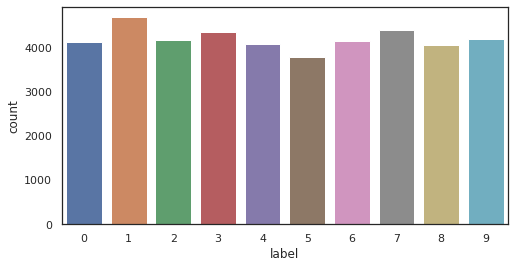

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train)

In [0]:
# Normalizing data
X_train = X_train.astype('float32') / 255.0
test = test.astype('float32') / 255.0

In [0]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [12]:
X_train.shape

(42000, 28, 28, 1)

In [13]:
test.shape

(28000, 28, 28, 1)

In [0]:
# Label Encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [15]:
Y_train.shape

(42000, 10)

In [16]:
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

Text(0.5, 1.0, '5')

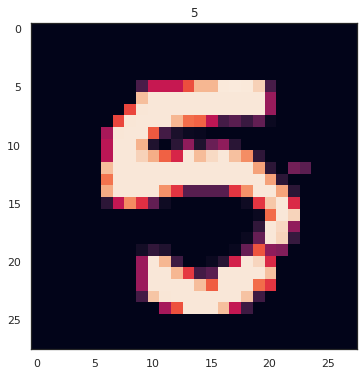

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:, :, 0])
plt.title(Y_train[1].argmax())

Text(0.5, 1.0, '6')

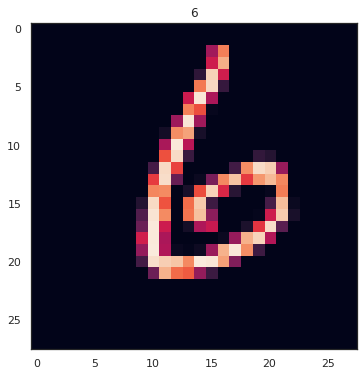

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[2][:, :, 0])
plt.title(Y_train[2].argmax())

In [23]:
X_train.shape

(37800, 28, 28, 1)

In [24]:
X_train[2].shape

(28, 28, 1)

In [0]:
# Building CNN architecture using keras
from keras.layers import Input, InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras
from keras import backend as K

In [0]:
inputShape = (28, 28, 1)
input = Input(inputShape)

x = Conv2D(64, (3, 3), strides=(1,1), name='layer_conv1', padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name='maxPool1')(x)

x = Conv2D(64, (3, 3), strides=(1,1), name='layer_conv2', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name='maxPool2')(x)

x = Conv2D(32, (3, 3), strides=(1, 1), name='conv3', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name='maxPool3')(x)

x = Flatten()(x)
x = Dense(64, activation='relu', name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation='relu', name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax', name='fc2')(x)

model = Model(inputs=input, outputs=x, name='Predict')

In [40]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 64)        256 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen_train.fit(X_train)

In [0]:
# optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
# Learning Rate Schedules
# lr = lr0 * drop^floor(epoch / epochs_drop)

import math
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.6
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate ]

In [0]:
# history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
#                     epochs=35, callbacks=callbacks_list, verbose=1)

In [0]:
checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=1, save_best_only=True)

In [0]:
history = model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=16),
                    validation_data=(X_valid, Y_valid),
                    epochs=10,
                    steps_per_epoch=X_train.shape[0],
                    callbacks=[checkpointer, lrate],
                    verbose=1)

Epoch 1/10
37800/37800 [==============================] - 2085s 55ms/step - loss: 2.3047 - acc: 0.1054 - val_loss: 2.3003 - val_acc: 0.1121

Epoch 00001: val_loss improved from inf to 2.30026, saving model to ./weights.hdf5
Epoch 2/10
 1828/37800 [>.............................] - ETA: 32:53 - loss: 2.3046 - acc: 0.1051

In [0]:
# model Evaluation
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# plotting train and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
print("on valid data")
pred1 = model.evaluate(X_valid, Y_valid)
print('accuracy', str(pred1[1]*100))
print('Total loss', str(pred1[0]*100))

In [0]:
# Visualize CNN Layers
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1, 28, 28, 1))

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
plt.imshow(X_train[10][:,:,0])

In [0]:
display_activation(activations, 8, 8, 1)

In [0]:
display_activation(activations, 8, 8, 3)

In [0]:
display_activation(activations, 8, 8, 7)

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_prediction, axis=1)
Y_true = np.argmax(Y_valid, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

In [0]:
# confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [0]:
results = model.predict(test)
results = np.argmax(results, axis=1)

In [0]:
submissions = pd.DataFrame({
    "ImageId": list(range(1, len(results) + 1)),
    "Label": results
})
submissions.to_csv("re2-submission.csv", index=False, header=True)